<a href="https://colab.research.google.com/github/teddcp/pandas-notes/blob/master/Time_Series_with_pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**yfinance**
-------------------------------------
* Before we can start, we have to install one additional package to our Anaconda Distribution:

* With this additional package, we are able to import stock price data from Yahoo Finance.

In [0]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=61a35615d6ba21de6860ceb94364ca7c9db9135959f23b1a52fcb5b6ff7b89c4
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 1. Importing and Exporting Stock Price Data from Yahoo Finance
---------------------------------------------------------------------------

In [0]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT" ] # Different stocks

In [0]:
yf.download('AAPL', start='2010-01-01', end='2020-01-01')  # Downloading one dataset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [0]:
yf.download(ticker, start='2010-01-01', end='2020-01-01', progress=False)  # Downloading all dataset and storing it

Adj Close                          ...   Volume                    
                  AAPL          BA         DIS  ...      IBM        KO      MSFT
Date                                            ...                             
2010-01-04   26.466835   43.441975   27.933924  ...  6155300  13870400  38409100
2010-01-05   26.512596   44.864773   27.864237  ...  6841400  23172400  49749600
2010-01-06   26.090879   46.225727   27.716166  ...  5605300  19264600  58182400
2010-01-07   26.042646   48.097031   27.724878  ...  5840600  13234600  50559700
2010-01-08   26.215786   47.633064   27.768419  ...  4197200  28712400  51197400
...                ...         ...         ...  ...      ...       ...       ...
2019-12-24  282.831299  331.030457  145.289993  ...  1202100   3359300   8989200
2019-12-26  288.442780  327.968689  145.699997  ...  2129700   6228500  14520600
2019-12-27  288.333313  328.187408  145.750000  ...  2752200   6895500  18412800
2019-12-30  290.044617  324.469513  143.770004  ...  4118900   6431700  16348400
2019-12-31  292.163818  323.833313  144.630005  ...  3777500   7982600  18369400

[2516 rows x 36 columns]

In [0]:
stocks= yf.download(ticker, start='2010-01-01', end='2020-01-01', progress=False)
stocks.head()

Adj Close                        ...   Volume                    
                 AAPL         BA        DIS  ...      IBM        KO      MSFT
Date                                         ...                             
2010-01-04  26.466835  43.441975  27.933924  ...  6155300  13870400  38409100
2010-01-05  26.512596  44.864773  27.864237  ...  6841400  23172400  49749600
2010-01-06  26.090879  46.225727  27.716166  ...  5605300  19264600  58182400
2010-01-07  26.042646  48.097031  27.724878  ...  5840600  13234600  50559700
2010-01-08  26.215786  47.633064  27.768419  ...  4197200  28712400  51197400

[5 rows x 36 columns]

In [0]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2516 non-null   float64
 1   (Adj Close, BA)    2516 non-null   float64
 2   (Adj Close, DIS)   2516 non-null   float64
 3   (Adj Close, IBM)   2516 non-null   float64
 4   (Adj Close, KO)    2516 non-null   float64
 5   (Adj Close, MSFT)  2516 non-null   float64
 6   (Close, AAPL)      2516 non-null   float64
 7   (Close, BA)        2516 non-null   float64
 8   (Close, DIS)       2516 non-null   float64
 9   (Close, IBM)       2516 non-null   float64
 10  (Close, KO)        2516 non-null   float64
 11  (Close, MSFT)      2516 non-null   float64
 12  (High, AAPL)       2516 non-null   float64
 13  (High, BA)         2516 non-null   float64
 14  (High, DIS)        2516 non-null   float64
 15  (High, IBM)        2516 non-null   float64
 16  (High,

In [0]:
# Storing it
stocks.to_csv('my_stocks.csv', index=True)

In [0]:
pd.read_csv('/content/my_stocks.csv').head()

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Close,Close.1,Close.2,Close.3,Close.4,Close.5,High,High.1,High.2,High.3,High.4,High.5,Low,Low.1,Low.2,Low.3,Low.4,Low.5,Open,Open.1,Open.2,Open.3,Open.4,Open.5,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5
0,NaN,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT,AAPL,BA,DIS,IBM,KO,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,26.466835021972656,43.44197463989258,27.933923721313477,94.72455596923828,19.292266845703125,24.22689437866211,30.572856903076172,56.18000030517578,32.06999969482422,132.4499969482422,28.520000457763672,30.950000762939453,30.64285659790039,56.38999938964844,32.75,132.97000122070312,28.610000610351562,31.100000381469727,30.34000015258789,54.79999923706055,31.8700008392334,130.85000610351562,28.450000762939453,30.59000015258789,30.489999771118164,55.720001220703125,32.5,131.17999267578125,28.579999923706055,30.6200008392334,123432400,6186700,13700400,6155300,13870400,38409100
3,2010-01-05,26.512596130371094,44.86477279663086,27.86423683166504,93.58028411865234,19.05889320373535,24.23472023010254,30.625713348388672,58.02000045776367,31.989999771118164,130.85000610351562,28.174999237060547,30.959999084472656,30.79857063293457,58.279998779296875,32.15999984741211,131.85000610351562,28.4950008392334,31.100000381469727,30.464284896850586,56.0,31.700000762939453,130.10000610351562,28.06999969482422,30.639999389648438,30.657142639160156,56.25,32.06999969482422,131.67999267578125,28.424999237060547,30.850000381469727,150476200,8867800,10307700,6841400,23172400,49749600
4,2010-01-06,26.090879440307617,46.22572708129883,27.71616554260254,92.97238159179688,19.0521240234375,24.085988998413086,30.13857078552246,59.779998779296875,31.81999969482422,130.0,28.165000915527344,30.770000457763672,30.747142791748047,59.9900016784668,32.0,131.49000549316406,28.219999313354492,31.079999923706055,30.10714340209961,57.880001068115234,31.68000030517578,129.80999755859375,27.989999771118164,30.520000457763672,30.625713348388672,58.22999954223633,31.899999618530273,130.67999267578125,28.174999237060547,30.8799991607666,138040000,8836500,10709500,5605300,19264600,58182400


In [0]:
# Making it a multi-index and adjusting the date column
data= pd.read_csv('/content/my_stocks.csv', header=[0,1], index_col=[0], parse_dates=[0])
data.head()

Adj Close                        ...   Volume                    
                 AAPL         BA        DIS  ...      IBM        KO      MSFT
Date                                         ...                             
2010-01-04  26.466835  43.441975  27.933924  ...  6155300  13870400  38409100
2010-01-05  26.512596  44.864773  27.864237  ...  6841400  23172400  49749600
2010-01-06  26.090879  46.225727  27.716166  ...  5605300  19264600  58182400
2010-01-07  26.042646  48.097031  27.724878  ...  5840600  13234600  50559700
2010-01-08  26.215786  47.633064  27.768419  ...  4197200  28712400  51197400

[5 rows x 36 columns]

In [0]:
# Making it to the old form
# Multi-index to tuples
data.columns.to_flat_index()

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'BA'),  ('Adj Close', 'DIS'),
        ('Adj Close', 'IBM'),   ('Adj Close', 'KO'), ('Adj Close', 'MSFT'),
           ('Close', 'AAPL'),       ('Close', 'BA'),      ('Close', 'DIS'),
            ('Close', 'IBM'),       ('Close', 'KO'),     ('Close', 'MSFT'),
            ('High', 'AAPL'),        ('High', 'BA'),       ('High', 'DIS'),
             ('High', 'IBM'),        ('High', 'KO'),      ('High', 'MSFT'),
             ('Low', 'AAPL'),         ('Low', 'BA'),        ('Low', 'DIS'),
              ('Low', 'IBM'),         ('Low', 'KO'),       ('Low', 'MSFT'),
            ('Open', 'AAPL'),        ('Open', 'BA'),       ('Open', 'DIS'),
             ('Open', 'IBM'),        ('Open', 'KO'),      ('Open', 'MSFT'),
          ('Volume', 'AAPL'),      ('Volume', 'BA'),     ('Volume', 'DIS'),
           ('Volume', 'IBM'),      ('Volume', 'KO'),    ('Volume', 'MSFT')],
      dtype='object')

In [0]:
data.columns= data.columns.to_flat_index()
data.head()

,"(Adj Close, AAPL)","(Adj Close, BA)","(Adj Close, DIS)","(Adj Close, IBM)","(Adj Close, KO)","(Adj Close, MSFT)","(Close, AAPL)","(Close, BA)","(Close, DIS)","(Close, IBM)","(Close, KO)","(Close, MSFT)","(High, AAPL)","(High, BA)","(High, DIS)","(High, IBM)","(High, KO)","(High, MSFT)","(Low, AAPL)","(Low, BA)","(Low, DIS)","(Low, IBM)","(Low, KO)","(Low, MSFT)","(Open, AAPL)","(Open, BA)","(Open, DIS)","(Open, IBM)","(Open, KO)","(Open, MSFT)","(Volume, AAPL)","(Volume, BA)","(Volume, DIS)","(Volume, IBM)","(Volume, KO)","(Volume, MSFT)"
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,26.466835,43.441975,27.933924,94.724556,19.292267,24.226894,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001,30.642857,56.389999,32.750000,132.970001,28.610001,31.100000,30.340000,54.799999,31.870001,130.850006,28.450001,30.590000,30.490000,55.720001,32.50,131.179993,28.580000,30.620001,123432400,6186700,13700400,6155300,13870400,38409100
2010-01-05,26.512596,44.864773,27.864237,93.580284,19.058893,24.234720,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999,30.798571,58.279999,32.160000,131.850006,28.495001,31.100000,30.464285,56.000000,31.700001,130.100006,28.070000,30.639999,30.657143,56.250000,32.07,131.679993,28.424999,30.850000,150476200,8867800,10307700,6841400,23172400,49749600
2010-01-06,26.090879,46.225727,27.716166,92.972382,19.052124,24.085989,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000,30.747143,59.990002,32.000000,131.490005,28.219999,31.080000,30.107143,57.880001,31.680000,129.809998,27.990000,30.520000,30.625713,58.230000,31.90,130.679993,28.174999,30.879999,138040000,8836500,10709500,5605300,19264600,58182400
2010-01-07,26.042646,48.097031,27.724878,92.650536,19.004770,23.835503,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001,30.285715,62.310001,31.860001,130.250000,28.184999,30.700001,29.864286,59.020000,31.540001,128.910004,27.875000,30.190001,30.250000,59.509998,31.77,129.869995,28.165001,30.629999,119282800,14379100,8202100,5840600,13234600,50559700
2010-01-08,26.215786,47.633064,27.768419,93.580284,18.653023,23.999893,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000,30.285715,61.779999,31.940001,130.919998,27.820000,30.879999,29.865715,60.860001,31.530001,129.050003,27.375000,30.240000,30.042856,61.540001,31.66,129.070007,27.730000,30.280001,111902700,7146600,7657500,4197200,28712400,51197400


In [0]:
# Again from tuples to Multi-index
data.columns= pd.MultiIndex.from_tuples(data.columns)
data.head()

Adj Close                        ...   Volume                    
                 AAPL         BA        DIS  ...      IBM        KO      MSFT
Date                                         ...                             
2010-01-04  26.466835  43.441975  27.933924  ...  6155300  13870400  38409100
2010-01-05  26.512596  44.864773  27.864237  ...  6841400  23172400  49749600
2010-01-06  26.090879  46.225727  27.716166  ...  5605300  19264600  58182400
2010-01-07  26.042646  48.097031  27.724878  ...  5840600  13234600  50559700
2010-01-08  26.215786  47.633064  27.768419  ...  4197200  28712400  51197400

[5 rows x 36 columns]

In [0]:
# We can swap the levels
data.swaplevel(axis=1).sort_index(axis=1).head()

AAPL                        ...       MSFT                     
            Adj Close      Close       High  ...        Low       Open    Volume
Date                                         ...                                
2010-01-04  26.466835  30.572857  30.642857  ...  30.590000  30.620001  38409100
2010-01-05  26.512596  30.625713  30.798571  ...  30.639999  30.850000  49749600
2010-01-06  26.090879  30.138571  30.747143  ...  30.520000  30.879999  58182400
2010-01-07  26.042646  30.082857  30.285715  ...  30.190001  30.629999  50559700
2010-01-08  26.215786  30.282858  30.285715  ...  30.240000  30.280001  51197400

[5 rows x 36 columns]

# 2. Initial Inspection and Visualization
-----------------------------------------------------------

In [0]:
data.head()

Adj Close                        ...   Volume                    
                 AAPL         BA        DIS  ...      IBM        KO      MSFT
Date                                         ...                             
2010-01-04  26.466835  43.441975  27.933924  ...  6155300  13870400  38409100
2010-01-05  26.512596  44.864773  27.864237  ...  6841400  23172400  49749600
2010-01-06  26.090879  46.225727  27.716166  ...  5605300  19264600  58182400
2010-01-07  26.042646  48.097031  27.724878  ...  5840600  13234600  50559700
2010-01-08  26.215786  47.633064  27.768419  ...  4197200  28712400  51197400

[5 rows x 36 columns]

In [0]:
# Taking a particular the attribute : Close
close= data.loc[:,'Close'].copy()
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000


In [0]:
plt.style.use('fivethirtyeight')

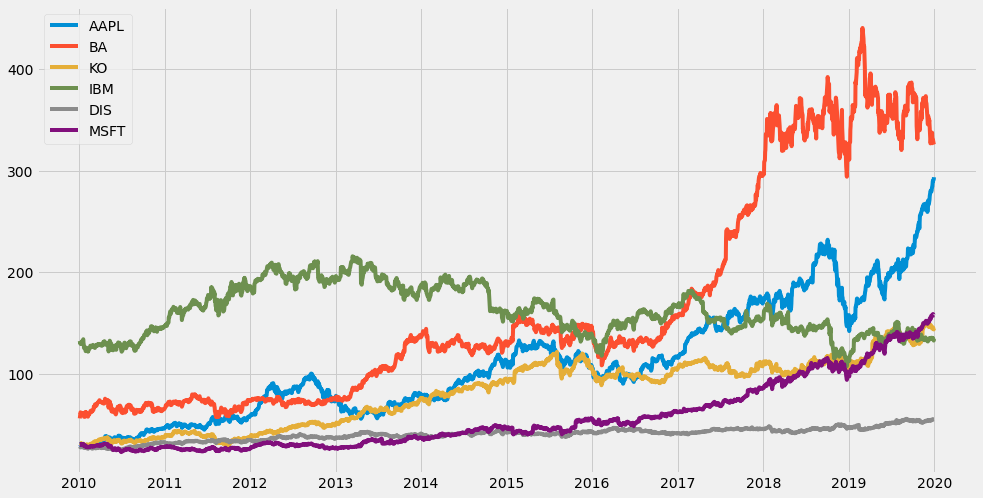

In [0]:
plt.figure(figsize=(15,8))
plt.plot(close)
plt.legend(ticker)
plt.show()

## Pandas Plotting
## close.plot(figsize = (15, 8 ), fontsize = 13)

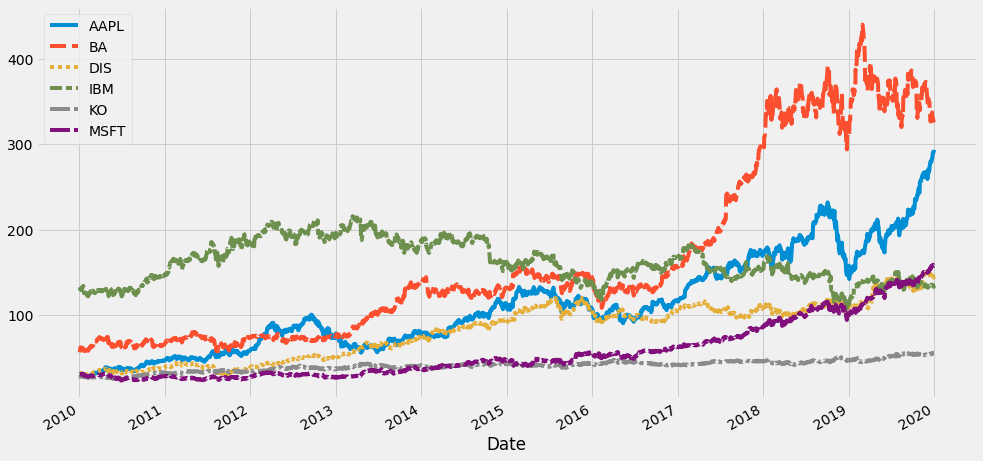

In [0]:
# Another way
import seaborn as sns

fig,ax= plt.subplots(1,1,figsize=(15,8))
g=sns.lineplot(data=close,ax=ax)
g.figure.autofmt_xdate()  # Formatting the labels

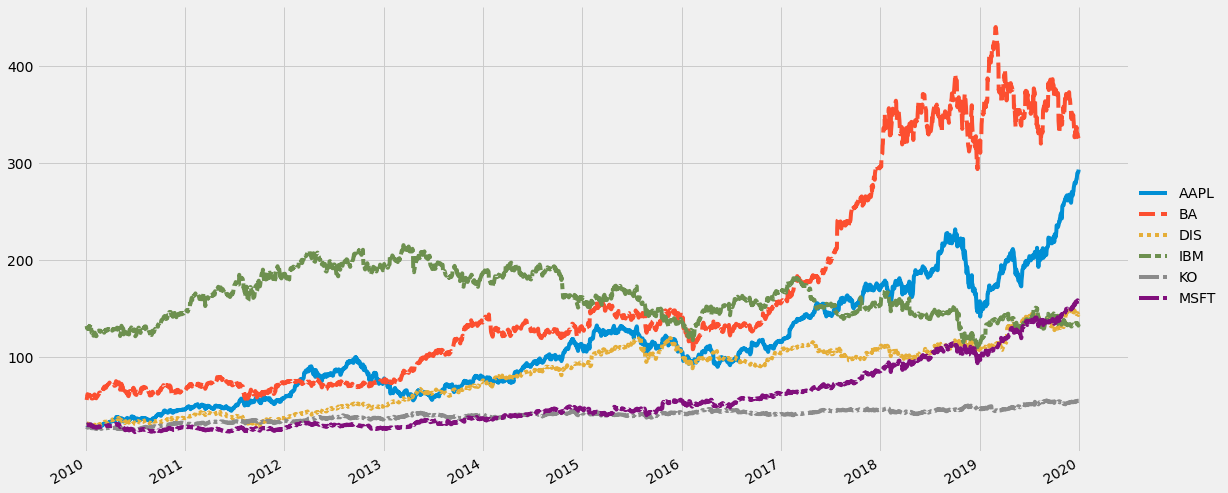

In [0]:
g= sns.relplot(kind='line',
            height=8,aspect=2,
            data=close)

g.fig.autofmt_xdate()

**Note**

1. All the data are not started from single point. Which is hard to distinguish the profitable line. We have to **Normalize** it.

# 3. Normalizing Time Series to a Base Value (100)
----------------------------------------------------------------

In [0]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000


In [0]:
# Normalizing a single column
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2010-01-04    100.000000
2010-01-05    100.172887
2010-01-06     98.579504
2010-01-07     98.397272
2010-01-08     99.051449
                 ...    
2019-12-24    929.811662
2019-12-26    948.259447
2019-12-27    947.899598
2019-12-30    953.525508
2019-12-31    960.492488
Name: AAPL, Length: 2516, dtype: float64

In [0]:
# Now Normalizing all the columns
norm= close.div(close.iloc[0,:]).mul(100)
norm.head(8)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.172887,103.275187,99.750546,98.792004,98.790318,100.032305
2010-01-06,98.579504,106.407972,99.220455,98.150248,98.755261,99.418416
2010-01-07,98.397272,110.715558,99.251638,97.810499,98.509814,98.384491
2010-01-08,99.051449,109.647558,99.407544,98.792004,96.686537,99.063002
2010-01-11,98.177657,108.348164,97.786096,97.757643,98.650069,97.802907
2010-01-12,97.060886,107.564970,96.102276,98.535294,99.719495,97.156701
2010-01-13,98.429981,108.864364,97.567824,98.323895,99.982465,98.061388


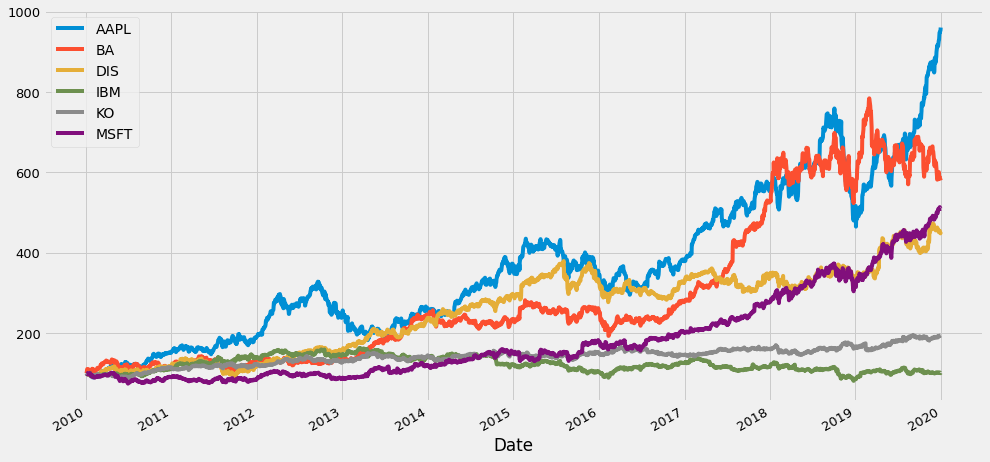

In [0]:
# Plotting the result

norm.plot(kind='line', figsize=(15,8), fontsize=13)

# 4. shift(), diff(), pct_change()
----------------------------------------------------

In [0]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000


In [0]:
# Selecting a single company : AAPL
aapl= close.AAPL.copy().to_frame()
aapl.head()

,AAPL
Date,
2010-01-04,30.572857
2010-01-05,30.625713
2010-01-06,30.138571
2010-01-07,30.082857
2010-01-08,30.282858


In [0]:
# We can shift the row or column values by a particular period
aapl.shift(periods=1,axis=0).head(7)

# We have shifted from up to down
# We can do the reverse by passing -ve integers

,AAPL
Date,
2010-01-04,NaN
2010-01-05,30.572857
2010-01-06,30.625713
2010-01-07,30.138571
2010-01-08,30.082857
2010-01-11,30.282858
2010-01-12,30.015715


In [0]:
aapl.shift(periods=1,axis=1, fill_value=0).head(7) 

# Column wise shifted  in the ---> direction: left to right
# also we can shift from right to left by passing negative periods

,AAPL
Date,
2010-01-04,0.0
2010-01-05,0.0
2010-01-06,0.0
2010-01-07,0.0
2010-01-08,0.0
2010-01-11,0.0
2010-01-12,0.0


In [0]:
aapl['lag1']= aapl.shift(periods=1,axis=0)
aapl.head()

,AAPL,lag1
Date,,
2010-01-04,30.572857,NaN
2010-01-05,30.625713,30.572857
2010-01-06,30.138571,30.625713
2010-01-07,30.082857,30.138571
2010-01-08,30.282858,30.082857


In [0]:
aapl['diff']= aapl.AAPL.sub(aapl.lag1)
aapl.head()

# Diff : difference between yesterday and today

,AAPL,lag1,diff
Date,,,
2010-01-04,30.572857,NaN,NaN
2010-01-05,30.625713,30.572857,0.052856
2010-01-06,30.138571,30.625713,-0.487143
2010-01-07,30.082857,30.138571,-0.055714
2010-01-08,30.282858,30.082857,0.200001


In [0]:
aapl.AAPL.div(aapl.lag1).head()

Date
2010-01-04         NaN
2010-01-05    1.001729
2010-01-06    0.984094
2010-01-07    0.998151
2010-01-08    1.006648
dtype: float64

In [0]:
  aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)
  aapl.head()

  # [ (new/old)- 1] * 100 -> Percent change
  # https://www.skillsyouneed.com/num/percent-change.html

,AAPL,lag1,diff,pct_change
Date,,,,
2010-01-04,30.572857,NaN,NaN,NaN
2010-01-05,30.625713,30.572857,0.052856,0.172887
2010-01-06,30.138571,30.625713,-0.487143,-1.590633
2010-01-07,30.082857,30.138571,-0.055714,-0.184858
2010-01-08,30.282858,30.082857,0.200001,0.664833


In [0]:
# Now using the diff() and pct_change() to achive the same thing

aapl['new_diff']= aapl.AAPL.diff(periods=1)
aapl['new_pct_change']= aapl.AAPL.pct_change(periods=1).mul(100)
aapl.drop(columns=['new_lag'],inplace=True)
aapl.head()

,AAPL,lag1,diff,pct_change,new_pct_change,new_diff
Date,,,,,,
2010-01-04,30.572857,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625713,30.572857,0.052856,0.172887,0.172887,0.052856
2010-01-06,30.138571,30.625713,-0.487143,-1.590633,-1.590633,-0.487143
2010-01-07,30.082857,30.138571,-0.055714,-0.184858,-0.184858,-0.055714
2010-01-08,30.282858,30.082857,0.200001,0.664833,0.664833,0.200001


In [0]:
# Till Now , we have been doing day wise operations
# Lets try for months : selecting the last day of every month
aapl.resample('M').last().head()

,AAPL,lag1,diff,pct_change,new_pct_change,new_diff
Date,,,,,,
2010-01-31,27.437143,28.469999,-1.032856,-3.627875,-3.627875,-1.032856
2010-02-28,29.231428,28.857143,0.374285,1.297026,1.297026,0.374285
2010-03-31,33.571430,33.692856,-0.121426,-0.360390,-0.360390,-0.121426
2010-04-30,37.298573,38.377144,-1.078571,-2.810452,-2.810452,-1.078571
2010-05-31,36.697144,36.192856,0.504288,1.393335,1.393335,0.504288


In [0]:
# Now calculaing the percent change month wise
aapl.AAPL.resample("M").last().pct_change(periods =1).mul(100)

Date
2010-01-31          NaN
2010-02-28     6.539620
2010-03-31    14.847041
2010-04-30    11.102126
2010-05-31    -1.612472
                ...    
2019-08-31    -2.018395
2019-09-30     7.296156
2019-10-31    11.068444
2019-11-30     7.432869
2019-12-31     9.878389
Freq: M, Name: AAPL, Length: 120, dtype: float64

In [0]:
#If we need to select the business/working days ofevery month
# we can use the BM 
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

# NOTICE: Index are changed now...

Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847041
2010-04-30    11.102126
2010-05-31    -1.612472
                ...    
2019-08-30    -2.018395
2019-09-30     7.296156
2019-10-31    11.068444
2019-11-29     7.432869
2019-12-31     9.878389
Freq: BM, Name: AAPL, Length: 120, dtype: float64

# 5. Measuring Stock Perfromance with MEAN Return and STD of Returns
-----------------------------------------------------------------------------

1. investors want higher mean with low variance/spread.

In [0]:
ret= close.AAPL.pct_change().to_frame()
ret.head()

,AAPL
Date,
2010-01-04,NaN
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648


In [0]:
ret.dropna(inplace=True)
ret.head()

,AAPL
Date,
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
2010-01-11,-0.008822


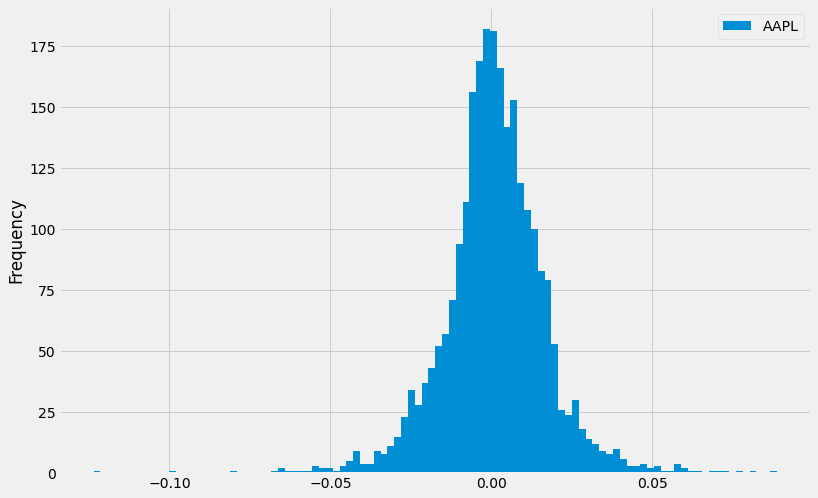

In [0]:
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)
plt.show()

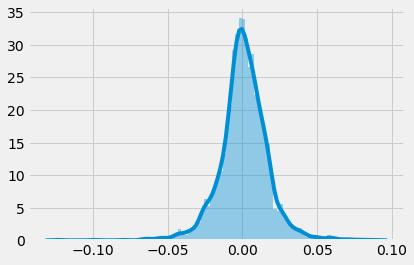

In [0]:
sns.distplot(ret,bins=100)

In [0]:
# Calculating the mean and std.deviation/SPREAD on daily basis
print(ret.mean(),'\n')
print(ret.std())

AAPL    0.001032
dtype: float64 

AAPL    0.016233
dtype: float64


In [0]:
import numpy as np

# Calculating on annual basis
# Multiplying with 252 , not with 365
# As there 113 holidays including bank's


an_mean= ret.mean()* 252
an_var= ret.std()* np.sqrt(252)
print(an_mean,'\n\n',an_var)

AAPL    0.26003
dtype: float64 

 AAPL    0.257697
dtype: float64


# 6. Financial Time Series - Return and Risk
---------------------------------------------------

So far, we have calculated for the AAPL only, now we will compare all the companiies.

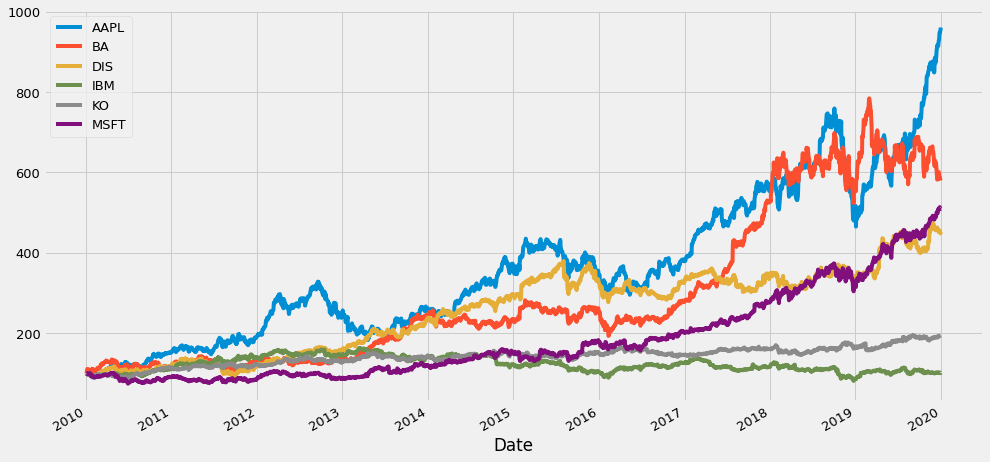

In [0]:
norm.plot(kind='line', figsize=(15,8), fontsize=13)
plt.legend(fontsize = 13)
plt.show()

In [0]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000


In [0]:
close.pct_change().dropna().head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2010-01-05,0.001729,0.032752,-0.002495,-0.012080,-0.012097,0.000323
2010-01-06,-0.015906,0.030334,-0.005314,-0.006496,-0.000355,-0.006137
2010-01-07,-0.001849,0.040482,0.000314,-0.003462,-0.002485,-0.010400
2010-01-08,0.006648,-0.009646,0.001571,0.010035,-0.018509,0.006897
2010-01-11,-0.008822,-0.011851,-0.016311,-0.010470,0.020308,-0.012720


In [0]:
ret = close.pct_change().dropna()
ret.agg(['mean','std']).T

,mean,std
AAPL,0.001032,0.016233
BA,0.000822,0.015690
DIS,0.000687,0.013278
IBM,0.000082,0.012381
KO,0.000308,0.009368
MSFT,0.000750,0.014334


In [0]:
summary= ret.agg(['mean','std']).T
summary['mean']= summary['mean'] * 252
summary['std']= summary['std'] * np.sqrt(252)

In [0]:
summary

,mean,std
AAPL,0.260030,0.257697
BA,0.207209,0.249071
DIS,0.173176,0.210778
IBM,0.020583,0.196548
KO,0.077534,0.148717
MSFT,0.189074,0.227549


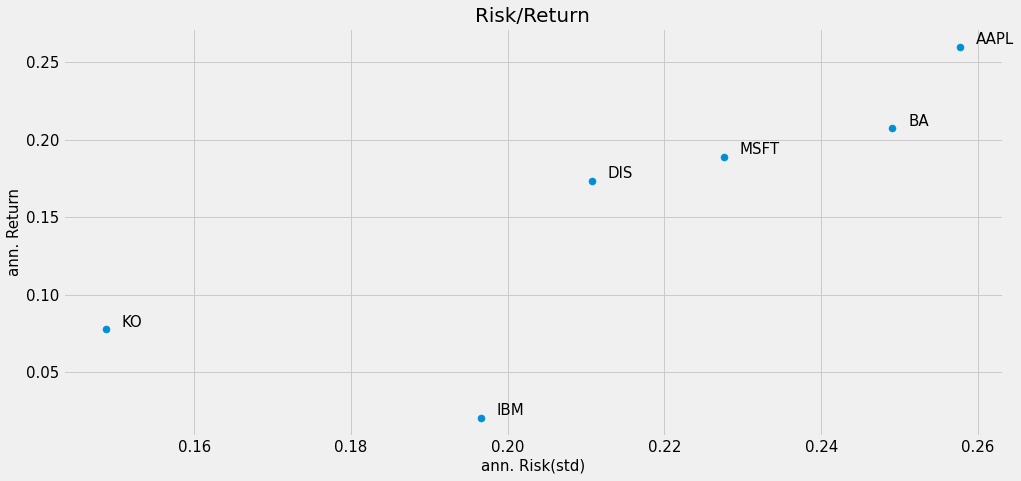

In [0]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,7), s = 50, fontsize = 15)

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [0]:
# We can plot the covariance and corelation
ret.cov()

,AAPL,BA,DIS,IBM,KO,MSFT
AAPL,0.000264,0.000099,0.000078,0.000077,0.000039,0.000106
BA,0.000099,0.000246,0.000099,0.000085,0.000052,0.000096
DIS,0.000078,0.000099,0.000176,0.000070,0.000050,0.000084
IBM,0.000077,0.000085,0.000070,0.000153,0.000044,0.000087
KO,0.000039,0.000052,0.000050,0.000044,0.000088,0.000049
MSFT,0.000106,0.000096,0.000084,0.000087,0.000049,0.000205


In [0]:
ret.corr()

,AAPL,BA,DIS,IBM,KO,MSFT
AAPL,1.000000,0.387645,0.363751,0.383092,0.254430,0.454270
BA,0.387645,1.000000,0.474818,0.435132,0.353391,0.428890
DIS,0.363751,0.474818,1.000000,0.427099,0.398352,0.438783
IBM,0.383092,0.435132,0.427099,1.000000,0.380061,0.489184
KO,0.254430,0.353391,0.398352,0.380061,1.000000,0.366050
MSFT,0.454270,0.428890,0.438783,0.489184,0.366050,1.000000


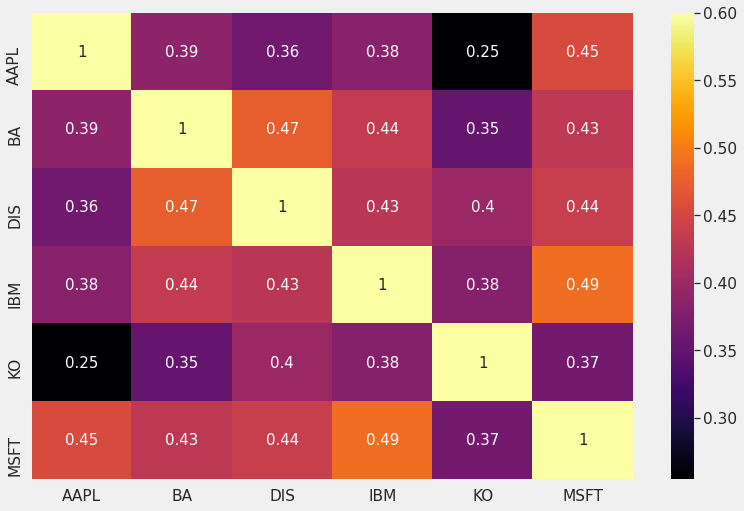

In [0]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "inferno", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

# 7. Helpful DatetimeIndex Attributes and Methods
-------------------------------------------------------

In [0]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

close = stocks.loc[:, "Close"].copy()
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,30.104286,54.130001,32.25,130.899994,28.500000,30.480000
2010-01-04,30.572857,56.180000,32.07,132.449997,28.520000,30.950001
2010-01-05,30.625713,58.020000,31.99,130.850006,28.174999,30.959999
2010-01-06,30.138571,59.779999,31.82,130.000000,28.165001,30.770000
2010-01-07,30.082857,62.200001,31.83,129.550003,28.094999,30.450001


In [0]:
close.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', name='Date', length=2289, freq=None)

In [0]:
# Now we can get the specific day,month,year for each index date atrribute
close.index.day

Int64Index([31,  4,  5,  6,  7,  8, 11, 12, 13, 14,
            ...
            23, 24, 25, 28, 29, 30, 31,  1,  4,  5],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.month

Int64Index([12,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
             1,  1,  1,  1,  1,  1,  1,  2,  2,  2],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.year

Int64Index([2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.day_name()

Index(['Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='Date', length=2289)

In [0]:
close.index.month_name()

Index(['December', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'February', 'February', 'February'],
      dtype='object', name='Date', length=2289)

In [0]:
close.index.weekday

Int64Index([3, 0, 1, 2, 3, 4, 0, 1, 2, 3,
            ...
            2, 3, 4, 0, 1, 2, 3, 4, 0, 1],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.quarter

Int64Index([4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.days_in_month

Int64Index([31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
            31, 31, 31, 31, 31, 31, 31, 28, 28, 28],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.week

# Same
# close.index.weekofyear

Int64Index([53,  1,  1,  1,  1,  1,  2,  2,  2,  2,
            ...
             4,  4,  4,  5,  5,  5,  5,  5,  6,  6],
           dtype='int64', name='Date', length=2289)

In [0]:
close.index.is_month_end

array([ True, False, False, ..., False, False, False])

In [0]:
close["Day"] = stocks.index.day_name()
close["Quarter"] = stocks.index.quarter

close.head()

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
Date,,,,,,,,
2009-12-31,30.104286,54.130001,32.25,130.899994,28.500000,30.480000,Thursday,4
2010-01-04,30.572857,56.180000,32.07,132.449997,28.520000,30.950001,Monday,1
2010-01-05,30.625713,58.020000,31.99,130.850006,28.174999,30.959999,Tuesday,1
2010-01-06,30.138571,59.779999,31.82,130.000000,28.165001,30.770000,Wednesday,1
2010-01-07,30.082857,62.200001,31.83,129.550003,28.094999,30.450001,Thursday,1


# 8. Filling NA values with ffill,bfill,interpolation
----------------------------------------------------------------

In [0]:
close.tail()

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
Date,,,,,,,,
2019-01-30,165.250000,387.720001,110.129997,134.380005,47.860001,106.379997,Wednesday,1
2019-01-31,166.440002,385.619995,111.519997,134.419998,48.130001,104.430000,Thursday,1
2019-02-01,166.520004,387.429993,111.300003,134.100006,48.700001,102.779999,Friday,1
2019-02-04,171.250000,397.000000,111.800003,135.190002,49.250000,105.739998,Monday,1
2019-02-05,174.179993,410.179993,112.660004,135.550003,49.259998,107.220001,Tuesday,1


In [0]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
Date,,,,,,,,
2009-12-31,30.104286,54.130001,32.25,130.899994,28.500000,30.480000,Thursday,4
2010-01-04,30.572857,56.180000,32.07,132.449997,28.520000,30.950001,Monday,1
2010-01-05,30.625713,58.020000,31.99,130.850006,28.174999,30.959999,Tuesday,1
2010-01-06,30.138571,59.779999,31.82,130.000000,28.165001,30.770000,Wednesday,1
2010-01-07,30.082857,62.200001,31.83,129.550003,28.094999,30.450001,Thursday,1


In [0]:
# On the above. only business days are included
# now we will put all the dates from 2009 to 2019

all_days = pd.date_range(start = "2009-12-31", end = "2019-02-06", freq = "D")
all_days

DatetimeIndex(['2009-12-31', '2010-01-01', '2010-01-02', '2010-01-03',
               '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09',
               ...
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', length=3325, freq='D')

In [0]:
close = close.reindex(all_days)
close.head(15)

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
2009-12-31,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Thursday,4.0
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001,Monday,1.0
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999,Tuesday,1.0
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000,Wednesday,1.0
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001,Thursday,1.0
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000,Friday,1.0
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Filling the null values for Day and Quarter
close.Day = close.index.day_name()
close.Quarter = close.index.quarter

close.head(10)

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
2009-12-31,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Thursday,4
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Friday,1
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,1
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,1
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001,Monday,1
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999,Tuesday,1
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000,Wednesday,1
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001,Thursday,1
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000,Friday,1
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,1


In [0]:
# Now with ffill to fill the null values in top to down manner
close.fillna(method = "ffill", inplace= True)
close.head(10)

# We could have used the 'bfill'
# but it is common to have the same value on weekeends as on the weekdays
# thus we have used the ffill

# Note
# we could have used the method parameter in reindex to fill the nan values
# in one step, we woould have done the same thing

,AAPL,BA,DIS,IBM,KO,MSFT,Day,Quarter
2009-12-31,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Thursday,4
2010-01-01,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Friday,1
2010-01-02,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Saturday,1
2010-01-03,30.104286,54.130001,32.250000,130.899994,28.500000,30.480000,Sunday,1
2010-01-04,30.572857,56.180000,32.070000,132.449997,28.520000,30.950001,Monday,1
2010-01-05,30.625713,58.020000,31.990000,130.850006,28.174999,30.959999,Tuesday,1
2010-01-06,30.138571,59.779999,31.820000,130.000000,28.165001,30.770000,Wednesday,1
2010-01-07,30.082857,62.200001,31.830000,129.550003,28.094999,30.450001,Thursday,1
2010-01-08,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000,Friday,1
2010-01-09,30.282858,61.599998,31.879999,130.850006,27.575001,30.660000,Saturday,1


**Now using ```interpolate()``` for continous data type**

In [0]:
temp = pd.read_csv("temp.csv", parse_dates=["datetime"], index_col = "datetime")
temp.head(5)

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [0]:
temp = temp.resample("30 Min").mean()
temp.head(10)

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 00:30:00,NaN,NaN
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 01:30:00,NaN,NaN
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 02:30:00,NaN,NaN
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 03:30:00,NaN,NaN
2013-01-01 04:00:00,8.8,-2.3


In [0]:
# As prevoiusly we only had hourly values
# Now we need to fill the new values
# here we can't use the ffill/bfill as it is a continous data type
# we can use the interpolate to get the middle value between any hours 
# i.e to get 12.30's Temperature, we can interpolate the 12.00 and 1.00's temperature

temp.interpolate()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.70,-1.10
2013-01-01 00:30:00,11.20,-1.40
2013-01-01 01:00:00,10.70,-1.70
2013-01-01 01:30:00,10.30,-1.85
2013-01-01 02:00:00,9.90,-2.00
...,...,...
2016-12-31 21:00:00,12.80,5.80
2016-12-31 21:30:00,12.55,5.75
2016-12-31 22:00:00,12.30,5.70
